## **Multi-Class Text Classification for make-up products by using Neural Networks**

In this project, we used Neural Network and Convolutional Neural Netwok to the text classification. In our analysis we used Keras framework. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalMaxPool1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import utils


In [ ]:
df = pd.read_csv('products_clean.csv', header=0,index_col=0)
df.head()

,product_type,description
0,lipstic,lippie pencil long wearing high intensity lip ...
1,lipstic,blotted lip sheer matte lipstick creates perfe...
2,lipstic,lippie stix formula contains vitamin e mango a...
3,foundation,developed selfie age buildable full coverage n...
4,lipstic,product free lead heavy metal parabens phthala...


In [ ]:
df.shape

(906, 2)

Spliting the data into train and test sets:

In [ ]:
sentences = df['description']
y = df['product_type']

sentences_train, sentences_test, train_y, test_y = train_test_split(sentences, y, test_size=0.25, random_state=42)

**Word Embeddings**

Word Embedding is a representation of text where words that have the same meaning have a similar representation. It shows words in a coordinate system where related words, based on a corpus of relationships, are placed closer together. In the deep learning frameworks such as  Keras, this part is generally handled by an embedding layer.

In [ ]:
tokenize = Tokenizer(num_words=1000)
tokenize.fit_on_texts(sentences_train)

X_train = tokenize.texts_to_sequences(sentences_train)
X_test = tokenize.texts_to_sequences(sentences_test)

vocab_size = len(tokenize.word_index) + 1  

print(sentences_train[2])
print(X_train[2])

lippie stix formula contains vitamin e mango avocado shea butter added comfort moisture none lippie formula contain nasty ingredient like parabens sulfate
[55, 358, 162, 810, 22, 121, 117, 500, 22, 198, 265, 4, 194, 14, 272, 321, 698, 218, 214, 596, 402, 597, 84, 93, 632, 288, 296, 237, 413]


In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[148 278  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
encoder = LabelEncoder()
encoder.fit(train_y)
y_train = encoder.transform(train_y)
y_test = encoder.transform(test_y)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

**Building the neural network model**

We built and trained a several models to choose best of them. First of them is a simple neural network model.

In [ ]:
embedding_dim = 16

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 16)           72304     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                25616     
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 85        
Total params: 98,005
Trainable params: 98,005
Non-trainable params: 0
_________________________________________________________________


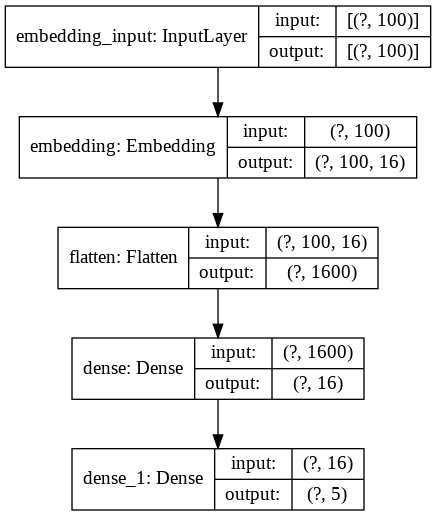

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=15,
                    validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 0s 9ms/step - loss: 1.5763 - accuracy: 0.3682 - val_loss: 1.5269 - val_accuracy: 0.4493
Epoch 2/15
22/22 [==============================] - 0s 3ms/step - loss: 1.5031 - accuracy: 0.4330 - val_loss: 1.4760 - val_accuracy: 0.4714
Epoch 3/15
22/22 [==============================] - 0s 3ms/step - loss: 1.4186 - accuracy: 0.4801 - val_loss: 1.3770 - val_accuracy: 0.4758
Epoch 4/15
22/22 [==============================] - 0s 4ms/step - loss: 1.2379 - accuracy: 0.5950 - val_loss: 1.1745 - val_accuracy: 0.5374
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 0.9722 - accuracy: 0.7776 - val_loss: 0.9377 - val_accuracy: 0.7313
Epoch 6/15
22/22 [==============================] - 0s 3ms/step - loss: 0.7018 - accuracy: 0.8645 - val_loss: 0.7600 - val_accuracy: 0.8062
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4906 - accuracy: 0.9219 - val_loss: 0.6122 - val_accuracy: 0.8634
Epoch 8/15
22/22 [==

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9985
Testing Accuracy:  0.9075


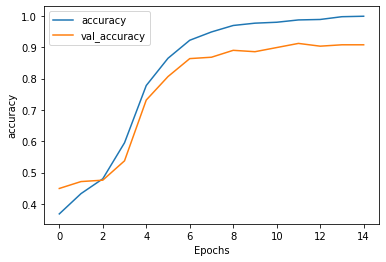

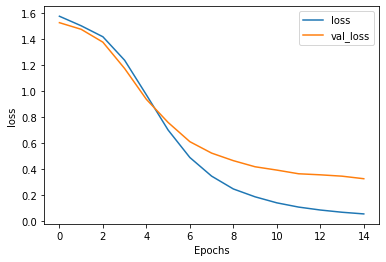

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

 At the end of the training, we can see that there is a little bit overfitting. 
 
 Now we add dropout layers as a method of regularization.

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 16)           72304     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                25616     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 85        
Total params: 98,005
Trainable params: 98,005
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_two = model2.fit(X_train, y_train,
                        batch_size=32,
                        epochs=15,
                        validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 0s 9ms/step - loss: 1.5486 - accuracy: 0.3402 - val_loss: 1.4551 - val_accuracy: 0.4537
Epoch 2/15
22/22 [==============================] - 0s 4ms/step - loss: 1.5176 - accuracy: 0.3844 - val_loss: 1.4576 - val_accuracy: 0.4714
Epoch 3/15
22/22 [==============================] - 0s 3ms/step - loss: 1.4749 - accuracy: 0.4183 - val_loss: 1.4237 - val_accuracy: 0.4714
Epoch 4/15
22/22 [==============================] - 0s 4ms/step - loss: 1.4271 - accuracy: 0.4286 - val_loss: 1.3738 - val_accuracy: 0.4758
Epoch 5/15
22/22 [==============================] - 0s 3ms/step - loss: 1.3298 - accuracy: 0.4507 - val_loss: 1.2525 - val_accuracy: 0.5066
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 1.2114 - accuracy: 0.5243 - val_loss: 1.0843 - val_accuracy: 0.6079
Epoch 7/15
22/22 [==============================] - 0s 3ms/step - loss: 1.0125 - accuracy: 0.6200 - val_loss: 0.9304 - val_accuracy: 0.7753
Epoch 8/15
22/22 [==

In [ ]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9941
Testing Accuracy:  0.8678


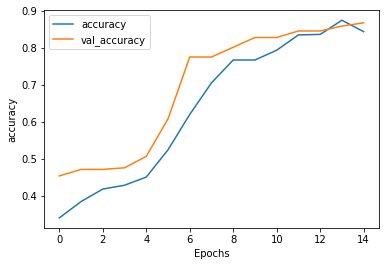

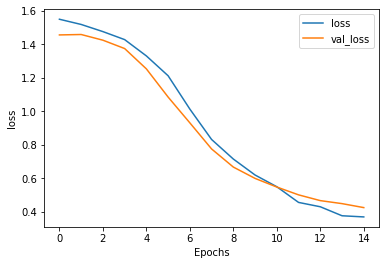

In [ ]:
plot_graphs(history_two, "accuracy")
plot_graphs(history_two, "loss")

Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding. 

In this case we used GlobalMaxPooling1D which is built-in layer Keras and we can add it to the sequential model:

In [ ]:
embedding_dim = 50

model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model3.add(GlobalMaxPool1D())
model3.add(Dense(16, activation='relu'))
model3.add(Dense(5, activation='softmax'))

model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           225950    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total params: 226,851
Trainable params: 226,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_3 = model3.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 0s 12ms/step - loss: 1.5949 - accuracy: 0.2091 - val_loss: 1.5811 - val_accuracy: 0.1806
Epoch 2/15
22/22 [==============================] - 0s 7ms/step - loss: 1.5638 - accuracy: 0.3726 - val_loss: 1.5460 - val_accuracy: 0.4890
Epoch 3/15
22/22 [==============================] - 0s 6ms/step - loss: 1.5192 - accuracy: 0.5700 - val_loss: 1.4922 - val_accuracy: 0.6167
Epoch 4/15
22/22 [==============================] - 0s 6ms/step - loss: 1.4554 - accuracy: 0.6009 - val_loss: 1.4153 - val_accuracy: 0.5991
Epoch 5/15
22/22 [==============================] - 0s 6ms/step - loss: 1.3650 - accuracy: 0.6082 - val_loss: 1.3129 - val_accuracy: 0.6344
Epoch 6/15
22/22 [==============================] - 0s 6ms/step - loss: 1.2474 - accuracy: 0.6627 - val_loss: 1.1749 - val_accuracy: 0.7533
Epoch 7/15
22/22 [==============================] - 0s 6ms/step - loss: 1.0934 - accuracy: 0.7644 - val_loss: 1.0047 - val_accuracy: 0.8106
Epoch 8/15
22/22 [=

In [ ]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9735
Testing Accuracy:  0.9163


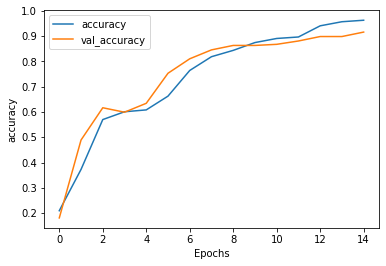

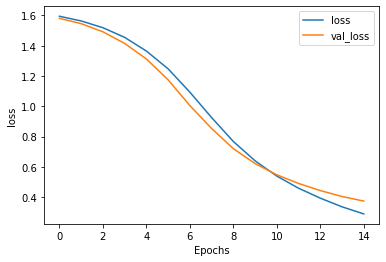

In [ ]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

#### Final Neural Network model

Our final Neural Network consist of an Embedding layer with GlobalMaxPool1D layer, hidden layer using the ReLU activation function. The output layer using the softmax activation function. We also used dropout layers as a method of regularization.
We used the Adam optimizer and categorical cross entropy loss as the loss function.

In [ ]:
embedding_dim = 50

model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model4.add(GlobalMaxPool1D())
model4.add(Dropout(0.2))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(5, activation='softmax'))

model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           225950    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                816       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 85        
Total params: 226,851
Trainable params: 226,851
Non-trainable params: 0
________________________________________________

We trained NN model for 15 epoch:

In [ ]:
history_4 = model4.fit(X_train, y_train,
                       batch_size=32,
                       epochs=15,
                       validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 0s 12ms/step - loss: 1.6062 - accuracy: 0.2224 - val_loss: 1.5875 - val_accuracy: 0.5022
Epoch 2/15
22/22 [==============================] - 0s 7ms/step - loss: 1.5768 - accuracy: 0.3711 - val_loss: 1.5546 - val_accuracy: 0.5066
Epoch 3/15
22/22 [==============================] - 0s 6ms/step - loss: 1.5396 - accuracy: 0.4315 - val_loss: 1.5030 - val_accuracy: 0.4670
Epoch 4/15
22/22 [==============================] - 0s 7ms/step - loss: 1.4852 - accuracy: 0.4153 - val_loss: 1.4280 - val_accuracy: 0.4670
Epoch 5/15
22/22 [==============================] - 0s 7ms/step - loss: 1.4075 - accuracy: 0.4271 - val_loss: 1.3391 - val_accuracy: 0.4670
Epoch 6/15
22/22 [==============================] - 0s 7ms/step - loss: 1.3191 - accuracy: 0.4433 - val_loss: 1.2436 - val_accuracy: 0.5066
Epoch 7/15
22/22 [==============================] - 0s 6ms/step - loss: 1.2069 - accuracy: 0.5464 - val_loss: 1.1282 - val_accuracy: 0.6300
Epoch 8/15
22/22 [=

In [ ]:
loss, accuracy = model4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9543
Testing Accuracy:  0.9339


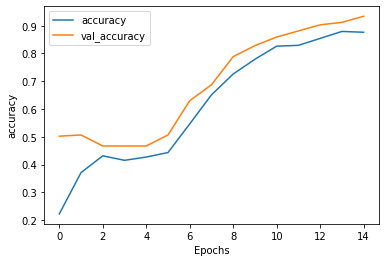

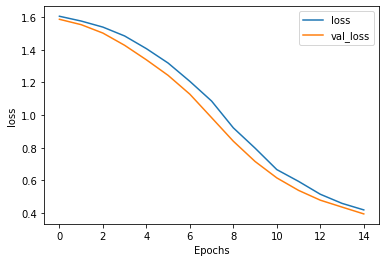

In [ ]:
plot_graphs(history_4, "accuracy")
plot_graphs(history_4, "loss")

**Convolutional Neural Network (CNN)**

A simple CNN architecture: Embedding layer with single layer Convolutional Neural Network (with RELU activation), and the GlobalMaxPool1D layer as well. The hidden layer using the ReLU activation function and an output layer using the softmax activation function. We used the Adam optimizer and categorical cross entropy loss as the loss function.

In [ ]:
embedding_dim = 50

model5 = Sequential()
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model5.add(Conv1D(128, 5, activation='relu'))
model5.add(GlobalMaxPool1D())
model5.add(Dense(10, activation='relu'))
model5.add(Dense(5, activation='softmax'))

model5.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model5.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 100, 50)           225950    
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 96, 128)           32128     
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_41 (Dense)             (None, 5)                 55        
Total params: 259,423
Trainable params: 259,423
Non-trainable params: 0
_________________________________________________________________


We trained CNN model for 5 epoch:

In [ ]:
history_5 = model5.fit(X_train, y_train,
                       batch_size=10,
                       epochs=5,
                       validation_data=(X_test, y_test))

Epoch 1/5
68/68 [==============================] - 1s 14ms/step - loss: 1.5243 - accuracy: 0.3608 - val_loss: 1.4174 - val_accuracy: 0.4714
Epoch 2/5
68/68 [==============================] - 1s 11ms/step - loss: 1.2113 - accuracy: 0.5611 - val_loss: 0.8595 - val_accuracy: 0.7797
Epoch 3/5
68/68 [==============================] - 1s 11ms/step - loss: 0.6216 - accuracy: 0.8645 - val_loss: 0.4337 - val_accuracy: 0.9075
Epoch 4/5
68/68 [==============================] - 1s 12ms/step - loss: 0.2523 - accuracy: 0.9602 - val_loss: 0.2886 - val_accuracy: 0.9163
Epoch 5/5
68/68 [==============================] - 1s 11ms/step - loss: 0.0983 - accuracy: 0.9823 - val_loss: 0.2321 - val_accuracy: 0.9295


In [ ]:
loss, accuracy = model5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9956
Testing Accuracy:  0.9295


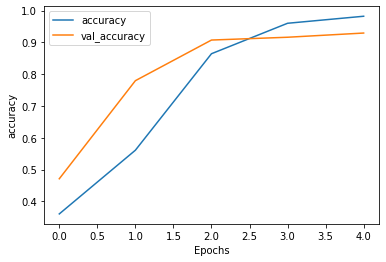

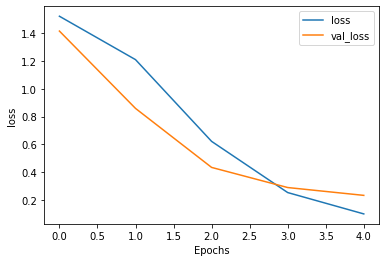

In [ ]:
plot_graphs(history_5, "accuracy")
plot_graphs(history_5, "loss")